In [59]:
import pandas as pd
import numpy as np

In [60]:
fama_french = pd.read_csv("data/05_df_ff_info.csv")
fundamentals = pd.read_csv("data/funda.csv")
stocks = pd.read_csv("data/monthlystocks.csv")

In [61]:
fundamentals = fundamentals[(fundamentals["exchg"]>=11) & (fundamentals["exchg"]<=19)]
fundamentals = fundamentals[fundamentals["curcd"] == "USD"]
fundamentals = fundamentals[fundamentals["indfmt"] == "INDL"]
fundamentals = fundamentals[fundamentals["fic"] == "USA"]
fundamentals = fundamentals[(fundamentals["sic"] <= 5999) | (fundamentals["sic"] >= 7000)]

In [62]:
fundamentals.shape

(181467, 17)

In [63]:
stocks = stocks[pd.to_numeric(stocks['RET'], errors='coerce').notnull()]

stocks['RET'] = pd.to_numeric(stocks['RET'])

stocks["date"] = pd.to_datetime(stocks["date"])

stocks = stocks[(stocks["RET"] < 500)]

stocks = stocks[(stocks["RET"] > -100)]

stocks = stocks[(stocks["SHROUT"] > 0)]

stocks["PRC"] = abs(stocks["PRC"])

stocks["PRC"] = stocks["PRC"].replace({0:np.nan})

stocks["SHROUT"] = stocks["SHROUT"].fillna(method="ffill")

stocks = stocks.dropna(subset=["SHROUT", "PRC"])

stocks["Market Cap"] = stocks["PRC"] * stocks["SHROUT"]

In [64]:
stocks.shape

(3459593, 7)

In [65]:
fundamentals

,GVKEY,LPERMNO,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,csho,xrd,exchg,costat,fic,mkvalt,prcc_f,sic
0,1000,25881,12/31/1975,1975.0,INDL,C,D,STD,USD,2.098,NaN,12,I,USA,NaN,4.375,3089.0
1,1000,25881,12/31/1976,1976.0,INDL,C,D,STD,USD,2.207,NaN,12,I,USA,NaN,5.750,3089.0
2,1000,25881,12/31/1977,1977.0,INDL,C,D,STD,USD,2.226,NaN,12,I,USA,NaN,9.250,3089.0
3,1001,10015,12/31/1983,1983.0,INDL,C,D,STD,USD,3.568,0.000,14,I,USA,NaN,7.250,5812.0
4,1001,10015,12/31/1984,1984.0,INDL,C,D,STD,USD,3.568,NaN,14,I,USA,NaN,3.750,5812.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284783,345920,20194,12/31/2021,2021.0,INDL,C,D,STD,USD,44.618,NaN,14,A,USA,1262.2432,28.290,3524.0
284784,345980,20333,12/31/2020,2020.0,INDL,C,D,STD,USD,587.000,222.000,14,A,USA,10706.8800,18.240,5961.0
284785,345980,20333,12/31/2021,2021.0,INDL,C,D,STD,USD,658.000,208.000,14,A,USA,2046.3800,3.110,5961.0
284786,347007,15533,12/31/2021,2021.0,INDL,C,D,STD,USD,397.830,195.958,14,A,USA,2418.8064,6.080,2836.0


In [66]:
fundamentals['datadate'] = pd.to_datetime(fundamentals['datadate'])

fundamentals['datadate'] = fundamentals['datadate'] + pd.DateOffset(months=3)

fundamentals['year'] = fundamentals['datadate'].dt.year

In [67]:
fundamentals['xrd'] = fundamentals['xrd'].fillna(0)

In [68]:
fundamentals

,GVKEY,LPERMNO,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,csho,xrd,exchg,costat,fic,mkvalt,prcc_f,sic,year
0,1000,25881,1976-03-31,1975.0,INDL,C,D,STD,USD,2.098,0.000,12,I,USA,NaN,4.375,3089.0,1976
1,1000,25881,1977-03-31,1976.0,INDL,C,D,STD,USD,2.207,0.000,12,I,USA,NaN,5.750,3089.0,1977
2,1000,25881,1978-03-31,1977.0,INDL,C,D,STD,USD,2.226,0.000,12,I,USA,NaN,9.250,3089.0,1978
3,1001,10015,1984-03-31,1983.0,INDL,C,D,STD,USD,3.568,0.000,14,I,USA,NaN,7.250,5812.0,1984
4,1001,10015,1985-03-31,1984.0,INDL,C,D,STD,USD,3.568,0.000,14,I,USA,NaN,3.750,5812.0,1985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284783,345920,20194,2022-03-31,2021.0,INDL,C,D,STD,USD,44.618,0.000,14,A,USA,1262.2432,28.290,3524.0,2022
284784,345980,20333,2021-03-31,2020.0,INDL,C,D,STD,USD,587.000,222.000,14,A,USA,10706.8800,18.240,5961.0,2021
284785,345980,20333,2022-03-31,2021.0,INDL,C,D,STD,USD,658.000,208.000,14,A,USA,2046.3800,3.110,5961.0,2022
284786,347007,15533,2022-03-31,2021.0,INDL,C,D,STD,USD,397.830,195.958,14,A,USA,2418.8064,6.080,2836.0,2022


In [69]:
fundamentals = fundamentals.sort_values(by=['datadate','LPERMNO']).reset_index(drop=True)

In [70]:
fundamentals

,GVKEY,LPERMNO,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,csho,xrd,exchg,costat,fic,mkvalt,prcc_f,sic,year
0,1215,10102,1976-03-31,1975.0,INDL,C,D,STD,USD,11.411,12.992,11,I,USA,NaN,17.625,2810.0,1976
1,1279,10137,1976-03-31,1975.0,INDL,C,D,STD,USD,27.292,0.000,11,I,USA,NaN,18.500,4911.0,1976
2,1300,10145,1976-03-31,1975.0,INDL,C,D,STD,USD,27.909,35.181,14,A,USA,NaN,33.250,9997.0,1976
3,1308,10153,1976-03-31,1975.0,INDL,C,D,STD,USD,10.702,40.100,11,I,USA,NaN,12.000,1381.0,1976
4,1365,10161,1976-03-31,1975.0,INDL,C,D,STD,USD,31.080,18.110,11,I,USA,NaN,47.250,3334.0,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181462,183945,93371,2022-03-31,2021.0,INDL,C,D,STD,USD,38.086,13.133,14,A,USA,1.732913e+02,4.550,2836.0,2022
181463,184258,93372,2022-03-31,2021.0,INDL,C,D,STD,USD,22.981,10.152,11,A,USA,8.976379e+02,39.060,3531.0,2022
181464,10567,93423,2022-03-31,2021.0,INDL,C,D,STD,USD,86.163,0.000,11,A,USA,3.668820e+03,42.580,7996.0,2022
181465,185138,93426,2022-03-31,2021.0,INDL,C,D,STD,USD,13.626,17.200,11,A,USA,5.057971e+02,37.120,3674.0,2022


In [71]:
weights = np.array([0.2, 0.4, 0.6, 0.8, 1.0])

rd_cap = fundamentals.groupby("LPERMNO")["xrd"].rolling(5).apply(lambda x: np.sum(weights*x)).reset_index(level=[0,1])[["level_1", "xrd"]].set_index('level_1').rename(columns={"xrd": "RDC"})

fundamentals = pd.merge(fundamentals, rd_cap, left_index=True, right_index=True)

In [72]:
fundamentals.shape

(181467, 19)

In [73]:
fundamentals[fundamentals["LPERMNO"] == 10145]

,GVKEY,LPERMNO,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,csho,xrd,exchg,costat,fic,mkvalt,prcc_f,sic,year,RDC
2,1300,10145,1976-03-31,1975.0,INDL,C,D,STD,USD,27.909,35.181,14,A,USA,NaN,33.2500,9997.0,1976,NaN
3367,1300,10145,1977-03-31,1976.0,INDL,C,D,STD,USD,28.003,42.302,14,A,USA,NaN,40.0000,9997.0,1977,NaN
6659,1300,10145,1978-03-31,1977.0,INDL,C,D,STD,USD,28.180,53.423,14,A,USA,NaN,44.2500,9997.0,1978,NaN
9927,1300,10145,1979-03-31,1978.0,INDL,C,D,STD,USD,28.518,57.721,14,A,USA,NaN,28.2500,9997.0,1979,NaN
13188,1300,10145,1980-03-31,1979.0,INDL,C,D,STD,USD,28.808,70.380,14,A,USA,NaN,49.1250,9997.0,1980,172.5676
16459,1300,10145,1981-03-31,1980.0,INDL,C,D,STD,USD,33.489,105.000,14,A,USA,NaN,53.5000,9997.0,1981,225.7662
19863,1300,10145,1982-03-31,1981.0,INDL,C,D,STD,USD,33.744,152.000,14,A,USA,NaN,43.8750,9997.0,1982,312.0010
23418,1300,10145,1983-03-31,1982.0,INDL,C,D,STD,USD,35.250,186.000,14,A,USA,NaN,32.3750,9997.0,1983,410.2962
27050,1300,10145,1984-03-31,1983.0,INDL,C,D,STD,USD,53.459,280.000,14,A,USA,NaN,55.7500,9997.0,1984,576.0760
31032,1300,10145,1985-03-31,1984.0,INDL,C,D,STD,USD,83.029,295.000,14,A,USA,NaN,34.5000,9997.0,1985,712.4000


In [74]:
fundamentals = fundamentals.dropna(subset=['RDC'])

In [75]:
fundamentals = fundamentals[["LPERMNO", "datadate", "RDC"]]

In [76]:
non_rd_firms_fund = fundamentals[fundamentals["RDC"] == 0].copy()
rd_firms_fund = fundamentals[fundamentals["RDC"] > 0].copy()

In [79]:
rd_firms_fund.shape

(61083, 3)

In [80]:
non_rd_firms_fund.shape

(61209, 3)

In [81]:
fundamentals.shape

(122292, 3)

In [83]:
non_rd_firms_fund.shape[0] + rd_firms_fund.shape[0] == fundamentals.shape[0]

True

In [84]:
fundamentals

,LPERMNO,datadate,RDC
12180,14955,1979-09-30,0.0000
12243,29867,1979-09-30,0.0000
12316,45225,1979-09-30,0.0000
12404,59871,1979-09-30,0.0000
12431,63336,1979-09-30,0.0070
...,...,...,...
181462,93371,2022-03-31,42.8924
181463,93372,2022-03-31,20.7738
181464,93423,2022-03-31,0.0000
181465,93426,2022-03-31,41.6000


In [85]:
stocks

,PERMNO,date,PRC,VOL,RET,SHROUT,Market Cap
2,10000,1986-02-28,3.25000,828.0,-0.257143,3680.0,1.196000e+04
3,10000,1986-03-31,4.43750,1078.0,0.365385,3680.0,1.633000e+04
4,10000,1986-04-30,4.00000,957.0,-0.098592,3793.0,1.517200e+04
5,10000,1986-05-30,3.10938,1074.0,-0.222656,3793.0,1.179388e+04
6,10000,1986-06-30,3.09375,1069.0,-0.005025,3793.0,1.173459e+04
...,...,...,...,...,...,...,...
3594905,93436,2021-08-31,735.71997,3812156.0,0.070605,1001767.0,7.370200e+08
3594906,93436,2021-09-30,775.47998,3889228.0,0.054042,1004000.0,7.785819e+08
3594907,93436,2021-10-29,1114.00000,5263955.0,0.436530,1004265.0,1.118751e+09
3594908,93436,2021-11-30,1144.76001,6457197.0,0.027612,1004265.0,1.149642e+09


In [86]:
stocks.rename({"date": "datadate", "PERMNO":"LPERMNO"}, axis=1, inplace=True)

In [87]:
stocks.head()

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap
2,10000,1986-02-28,3.25000,828.0,-0.257143,3680.0,11960.00000
3,10000,1986-03-31,4.43750,1078.0,0.365385,3680.0,16330.00000
4,10000,1986-04-30,4.00000,957.0,-0.098592,3793.0,15172.00000
5,10000,1986-05-30,3.10938,1074.0,-0.222656,3793.0,11793.87834
6,10000,1986-06-30,3.09375,1069.0,-0.005025,3793.0,11734.59375


In [88]:
rd_firms_fund["datadate"] = [pd.Timestamp(year=i.year+1,month=3, day=31) if i > pd.Timestamp(year=i.year, month=4, day=1) else pd.Timestamp(year=i.year,month=3, day=31)  for i in rd_firms_fund["datadate"]]
non_rd_firms_fund["datadate"] = [pd.Timestamp(year=i.year+1,month=3, day=31) if i > pd.Timestamp(year=i.year, month=4, day=1) else pd.Timestamp(year=i.year,month=3, day=31)  for i in non_rd_firms_fund["datadate"]]

In [89]:
rd_firms_fund

,LPERMNO,datadate,RDC
12431,63336,1980-03-31,0.0070
12503,20343,1980-03-31,18.4940
12565,57534,1980-03-31,0.5690
12775,30736,1980-03-31,4.7228
12777,31077,1980-03-31,2.6684
...,...,...,...
181460,93356,2022-03-31,94.3116
181462,93371,2022-03-31,42.8924
181463,93372,2022-03-31,20.7738
181465,93426,2022-03-31,41.6000


In [90]:
from pandas.tseries.offsets import MonthEnd

stocks['datadate'] = stocks['datadate'] + MonthEnd(0)


In [91]:
rd_firms = pd.merge(stocks[["datadate", "Market Cap", "LPERMNO"]], rd_firms_fund, on = ["LPERMNO", "datadate"], how="right")

In [92]:
non_rd_firms = pd.merge(stocks[["datadate", "Market Cap", "LPERMNO"]], non_rd_firms_fund, on = ["LPERMNO", "datadate"], how="right")

In [93]:
non_rd_firms.shape

(61209, 4)

In [94]:
non_rd_firms

,datadate,Market Cap,LPERMNO,RDC
0,1980-03-31,NaN,14955,0.0
1,1980-03-31,NaN,29867,0.0
2,1980-03-31,NaN,45225,0.0
3,1980-03-31,NaN,59871,0.0
4,1980-03-31,NaN,68655,0.0
...,...,...,...,...
61204,2022-03-31,NaN,93174,0.0
61205,2022-03-31,NaN,93285,0.0
61206,2022-03-31,NaN,93302,0.0
61207,2022-03-31,NaN,93369,0.0


In [95]:
rd_firms.isna().sum()

datadate         0
Market Cap    5192
LPERMNO          0
RDC              0
dtype: int64

In [96]:
non_rd_firms.isna().sum()

datadate         0
Market Cap    5390
LPERMNO          0
RDC              0
dtype: int64

In [97]:
stocks[(stocks["LPERMNO"]==63336)]

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap
1494170,63336,1981-06-30,0.75000,NaN,0.000000,2192.0,1644.000
1494171,63336,1981-07-31,0.75000,NaN,0.000000,2192.0,1644.000
1494172,63336,1981-08-31,0.62500,NaN,-0.166667,2192.0,1370.000
1494173,63336,1981-09-30,0.62500,NaN,0.000000,2192.0,1370.000
1494174,63336,1981-10-31,0.75000,NaN,0.200000,2192.0,1644.000
1494175,63336,1981-11-30,0.75000,NaN,0.000000,2192.0,1644.000
1494176,63336,1981-12-31,1.00000,NaN,0.333333,2192.0,2192.000
1494177,63336,1982-01-31,1.25000,NaN,0.250000,2192.0,2740.000
1494178,63336,1982-02-28,1.25000,NaN,0.000000,2192.0,2740.000
1494179,63336,1982-03-31,1.87500,NaN,0.500000,2192.0,4110.000


In [98]:
rd_firms[rd_firms["LPERMNO"] == 63336]

,datadate,Market Cap,LPERMNO,RDC
0,1980-03-31,NaN,63336,0.007
964,1981-03-31,NaN,63336,0.001


In [99]:
stocks[(stocks["LPERMNO"]==93356) & (stocks["datadate"].dt.month == 3)]

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap
3586950,93356,2011-03-31,15.51,7425.0,0.000645,11882.0,184289.82
3586962,93356,2012-03-31,26.88,13461.0,0.081690,12187.0,327586.56
3586974,93356,2013-03-31,42.67,19375.0,0.141214,15002.0,640135.34
3586986,93356,2014-03-31,61.45,15492.0,-0.093658,16183.0,994445.35
3586998,93356,2015-03-31,67.10,23382.0,-0.023290,16525.0,1108827.50
3587010,93356,2016-03-31,42.94,42642.0,-0.039803,16882.0,724913.08
3587022,93356,2017-03-31,58.49,35608.0,0.057112,17181.0,1004916.69
3587034,93356,2018-03-31,64.07,32853.0,0.067477,17110.0,1096237.70
3587046,93356,2019-03-31,106.06,25164.0,-0.006743,17468.0,1852656.08
3587058,93356,2020-03-31,46.51,74130.0,-0.115779,34993.0,1627524.43


In [100]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC
0,1980-03-31,NaN,63336,0.0070
1,1980-03-31,NaN,20343,18.4940
2,1980-03-31,NaN,57534,0.5690
3,1980-03-31,NaN,30736,4.7228
4,1980-03-31,NaN,31077,2.6684
...,...,...,...,...
61078,2022-03-31,NaN,93356,94.3116
61079,2022-03-31,NaN,93371,42.8924
61080,2022-03-31,NaN,93372,20.7738
61081,2022-03-31,NaN,93426,41.6000


In [101]:
rd_firms["RDC/Market Cap"] = rd_firms["RDC"] / rd_firms["Market Cap"]

In [102]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap
0,1980-03-31,NaN,63336,0.0070,NaN
1,1980-03-31,NaN,20343,18.4940,NaN
2,1980-03-31,NaN,57534,0.5690,NaN
3,1980-03-31,NaN,30736,4.7228,NaN
4,1980-03-31,NaN,31077,2.6684,NaN
...,...,...,...,...,...
61078,2022-03-31,NaN,93356,94.3116,NaN
61079,2022-03-31,NaN,93371,42.8924,NaN
61080,2022-03-31,NaN,93372,20.7738,NaN
61081,2022-03-31,NaN,93426,41.6000,NaN


In [103]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap
0,1980-03-31,NaN,63336,0.0070,NaN
1,1980-03-31,NaN,20343,18.4940,NaN
2,1980-03-31,NaN,57534,0.5690,NaN
3,1980-03-31,NaN,30736,4.7228,NaN
4,1980-03-31,NaN,31077,2.6684,NaN
...,...,...,...,...,...
61078,2022-03-31,NaN,93356,94.3116,NaN
61079,2022-03-31,NaN,93371,42.8924,NaN
61080,2022-03-31,NaN,93372,20.7738,NaN
61081,2022-03-31,NaN,93426,41.6000,NaN


In [104]:
rd_firms.dropna(inplace=True)
non_rd_firms.dropna(inplace=True)

In [105]:
rd_firms['bins'] = rd_firms.groupby(['datadate'])['RDC/Market Cap'].transform(lambda x: pd.qcut(x, 5, labels=["L", "2", "3", "4", "H"]))

In [106]:
rd_firms["bins"].value_counts()

L    11195
H    11186
2    11170
3    11170
4    11170
Name: bins, dtype: int64

In [107]:
non_rd_firms.shape

(55819, 4)

In [108]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap,bins
1900,1982-03-31,7.972000e+03,11157,0.5472,0.000069,3
1901,1982-03-31,2.340000e+04,19035,1.1714,0.000050,2
1902,1982-03-31,1.907275e+04,21726,2.3872,0.000125,3
1903,1982-03-31,9.932250e+03,31595,0.6508,0.000066,2
1905,1982-03-31,2.670000e+04,35182,0.0560,0.000002,L
...,...,...,...,...,...,...
59710,2021-03-31,3.800795e+05,93371,46.4540,0.000122,4
59711,2021-03-31,1.054851e+06,93372,14.9466,0.000014,L
59712,2021-03-31,1.746755e+06,93393,95.7252,0.000055,3
59713,2021-03-31,3.878055e+05,93426,36.2600,0.000094,4


In [110]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap,bins
1900,1982-03-31,7.972000e+03,11157,0.5472,0.000069,3
1901,1982-03-31,2.340000e+04,19035,1.1714,0.000050,2
1902,1982-03-31,1.907275e+04,21726,2.3872,0.000125,3
1903,1982-03-31,9.932250e+03,31595,0.6508,0.000066,2
1905,1982-03-31,2.670000e+04,35182,0.0560,0.000002,L
...,...,...,...,...,...,...
59710,2021-03-31,3.800795e+05,93371,46.4540,0.000122,4
59711,2021-03-31,1.054851e+06,93372,14.9466,0.000014,L
59712,2021-03-31,1.746755e+06,93393,95.7252,0.000055,3
59713,2021-03-31,3.878055e+05,93426,36.2600,0.000094,4


In [114]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap,bins,Market Cap Shifted
1900,1982-03-31,7.972000e+03,11157,0.5472,0.000069,3,NaN
1901,1982-03-31,2.340000e+04,19035,1.1714,0.000050,2,NaN
1902,1982-03-31,1.907275e+04,21726,2.3872,0.000125,3,NaN
1903,1982-03-31,9.932250e+03,31595,0.6508,0.000066,2,NaN
1905,1982-03-31,2.670000e+04,35182,0.0560,0.000002,L,NaN
...,...,...,...,...,...,...,...
59710,2021-03-31,3.800795e+05,93371,46.4540,0.000122,4,93795.93
59711,2021-03-31,1.054851e+06,93372,14.9466,0.000014,L,809485.96
59712,2021-03-31,1.746755e+06,93393,95.7252,0.000055,3,252691.96
59713,2021-03-31,3.878055e+05,93426,36.2600,0.000094,4,251220.88


In [117]:
rd_firms["year"] = rd_firms["datadate"].dt.year

In [119]:
non_rd_firms["year"] = non_rd_firms["datadate"].dt.year

In [118]:
rd_firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap,bins,Market Cap Shifted,year
1900,1982-03-31,7.972000e+03,11157,0.5472,0.000069,3,NaN,1982
1901,1982-03-31,2.340000e+04,19035,1.1714,0.000050,2,NaN,1982
1902,1982-03-31,1.907275e+04,21726,2.3872,0.000125,3,NaN,1982
1903,1982-03-31,9.932250e+03,31595,0.6508,0.000066,2,NaN,1982
1905,1982-03-31,2.670000e+04,35182,0.0560,0.000002,L,NaN,1982
...,...,...,...,...,...,...,...,...
59710,2021-03-31,3.800795e+05,93371,46.4540,0.000122,4,93795.93,2021
59711,2021-03-31,1.054851e+06,93372,14.9466,0.000014,L,809485.96,2021
59712,2021-03-31,1.746755e+06,93393,95.7252,0.000055,3,252691.96,2021
59713,2021-03-31,3.878055e+05,93426,36.2600,0.000094,4,251220.88,2021


In [121]:
non_rd_firms["bins"] = "N"

In [122]:
non_rd_firms

,datadate,Market Cap,LPERMNO,RDC,year,bins
2202,1982-03-31,427171.500,10559,0.0,1982,N
2204,1982-03-31,380962.125,12626,0.0,1982,N
2205,1982-03-31,3286.125,12723,0.0,1982,N
2206,1982-03-31,2185077.000,12749,0.0,1982,N
2207,1982-03-31,40203.000,13012,0.0,1982,N
...,...,...,...,...,...,...
60188,2021-03-31,1945530.000,93174,0.0,2021,N
60189,2021-03-31,107116.471,93285,0.0,2021,N
60190,2021-03-31,25574.850,93302,0.0,2021,N
60191,2021-03-31,6448933.360,93369,0.0,2021,N


In [203]:
stocks["year"] = [i.year if i >= pd.Timestamp(year=i.year, month=4, day=1) else i.year-1 for i in stocks["datadate"]]

In [205]:
stocks

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year
2,10000,1986-02-28,3.25000,828.0,-0.257143,3680.0,1.196000e+04,1985
3,10000,1986-03-31,4.43750,1078.0,0.365385,3680.0,1.633000e+04,1985
4,10000,1986-04-30,4.00000,957.0,-0.098592,3793.0,1.517200e+04,1986
5,10000,1986-05-31,3.10938,1074.0,-0.222656,3793.0,1.179388e+04,1986
6,10000,1986-06-30,3.09375,1069.0,-0.005025,3793.0,1.173459e+04,1986
...,...,...,...,...,...,...,...,...
3594905,93436,2021-08-31,735.71997,3812156.0,0.070605,1001767.0,7.370200e+08,2021
3594906,93436,2021-09-30,775.47998,3889228.0,0.054042,1004000.0,7.785819e+08,2021
3594907,93436,2021-10-31,1114.00000,5263955.0,0.436530,1004265.0,1.118751e+09,2021
3594908,93436,2021-11-30,1144.76001,6457197.0,0.027612,1004265.0,1.149642e+09,2021


In [206]:
firms = pd.concat([rd_firms, non_rd_firms])

In [207]:
firms

,datadate,Market Cap,LPERMNO,RDC,RDC/Market Cap,bins,Market Cap Shifted,year
1900,1982-03-31,7972.000,11157,0.5472,0.000069,3,NaN,1982
1901,1982-03-31,23400.000,19035,1.1714,0.000050,2,NaN,1982
1902,1982-03-31,19072.750,21726,2.3872,0.000125,3,NaN,1982
1903,1982-03-31,9932.250,31595,0.6508,0.000066,2,NaN,1982
1905,1982-03-31,26700.000,35182,0.0560,0.000002,L,NaN,1982
...,...,...,...,...,...,...,...,...
60188,2021-03-31,1945530.000,93174,0.0000,NaN,N,NaN,2021
60189,2021-03-31,107116.471,93285,0.0000,NaN,N,NaN,2021
60190,2021-03-31,25574.850,93302,0.0000,NaN,N,NaN,2021
60191,2021-03-31,6448933.360,93369,0.0000,NaN,N,NaN,2021


In [208]:
stocks

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year
2,10000,1986-02-28,3.25000,828.0,-0.257143,3680.0,1.196000e+04,1985
3,10000,1986-03-31,4.43750,1078.0,0.365385,3680.0,1.633000e+04,1985
4,10000,1986-04-30,4.00000,957.0,-0.098592,3793.0,1.517200e+04,1986
5,10000,1986-05-31,3.10938,1074.0,-0.222656,3793.0,1.179388e+04,1986
6,10000,1986-06-30,3.09375,1069.0,-0.005025,3793.0,1.173459e+04,1986
...,...,...,...,...,...,...,...,...
3594905,93436,2021-08-31,735.71997,3812156.0,0.070605,1001767.0,7.370200e+08,2021
3594906,93436,2021-09-30,775.47998,3889228.0,0.054042,1004000.0,7.785819e+08,2021
3594907,93436,2021-10-31,1114.00000,5263955.0,0.436530,1004265.0,1.118751e+09,2021
3594908,93436,2021-11-30,1144.76001,6457197.0,0.027612,1004265.0,1.149642e+09,2021


In [136]:
stocks.shape

(3459593, 8)

In [137]:
firms.shape

(111710, 7)

In [209]:
stocks_w_bins = pd.merge(stocks, firms[["LPERMNO", "bins", "year"]], on=["LPERMNO", "year"], how="inner")

In [210]:
stocks_w_bins

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins
0,10001,1991-04-30,9.87500,243.0,0.039474,1054.0,1.040825e+04,1991,N
1,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,1.040825e+04,1991,N
2,10001,1991-06-30,10.50000,255.0,0.078481,1073.0,1.126650e+04,1991,N
3,10001,1991-07-31,10.12500,161.0,-0.035714,1073.0,1.086412e+04,1991,N
4,10001,1991-08-31,11.50000,654.0,0.135802,1073.0,1.233950e+04,1991,N
...,...,...,...,...,...,...,...,...,...
1278262,93436,2021-08-31,735.71997,3812156.0,0.070605,1001767.0,7.370200e+08,2021,L
1278263,93436,2021-09-30,775.47998,3889228.0,0.054042,1004000.0,7.785819e+08,2021,L
1278264,93436,2021-10-31,1114.00000,5263955.0,0.436530,1004265.0,1.118751e+09,2021,L
1278265,93436,2021-11-30,1144.76001,6457197.0,0.027612,1004265.0,1.149642e+09,2021,L


In [214]:
stocks_w_bins["Market Cap Shifted"] = stocks_w_bins.groupby(["LPERMNO"])["Market Cap"].shift(1)

In [217]:
stocks_w_bins.dropna(subset=["Market Cap Shifted"], inplace=True)

In [218]:
stocks_w_bins_sum = pd.merge(stocks_w_bins, stocks_w_bins.groupby(["datadate", "bins"])["Market Cap Shifted"].sum().reset_index(), on=["datadate", "bins"], how="inner").rename({"Market Cap Shifted_y": "Sum Market Cap Shifted", "Market Cap Shifted_x": "Market Cap Shifted"}, axis=1)

In [220]:
stocks_w_bins_sum

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins,Market Cap Shifted,Sum Market Cap Shifted
0,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,10408.25000,1991,N,10408.25000,9.793220e+08
1,10005,1991-05-31,0.07813,137.0,0.000000,8376.0,654.41688,1991,N,654.41688,9.793220e+08
2,10018,1991-05-31,0.71875,238.0,-0.061224,3071.0,2207.28125,1991,N,2351.24973,9.793220e+08
3,10021,1991-05-31,0.56250,85.0,-0.307692,2750.0,1546.87500,1991,N,2234.37500,9.793220e+08
4,10028,1991-05-31,0.25000,297.0,0.066667,5570.0,1392.50000,1991,N,1305.49660,9.793220e+08
...,...,...,...,...,...,...,...,...,...,...,...
1267905,60186,1982-04-30,18.12500,NaN,0.132813,953.0,17273.12500,1982,N,17273.12500,7.025635e+06
1267906,62578,1982-04-30,4.25000,1624.0,0.030303,5645.0,23991.25000,1982,N,23991.25000,7.025635e+06
1267907,22585,1982-04-30,6.37500,NaN,0.024000,1751.0,11162.62500,1982,H,11162.62500,1.116262e+04
1267908,59029,1982-04-30,14.25000,1449.0,-0.050000,11526.0,164245.50000,1982,4,164245.50000,1.642455e+05


In [221]:
stocks_w_bins_sum["weight"] = stocks_w_bins_sum["Market Cap Shifted"] / stocks_w_bins_sum["Sum Market Cap Shifted"]

In [222]:
stocks_w_bins_sum

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins,Market Cap Shifted,Sum Market Cap Shifted,weight
0,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,10408.25000,1991,N,10408.25000,9.793220e+08,1.062802e-05
1,10005,1991-05-31,0.07813,137.0,0.000000,8376.0,654.41688,1991,N,654.41688,9.793220e+08,6.682346e-07
2,10018,1991-05-31,0.71875,238.0,-0.061224,3071.0,2207.28125,1991,N,2351.24973,9.793220e+08,2.400895e-06
3,10021,1991-05-31,0.56250,85.0,-0.307692,2750.0,1546.87500,1991,N,2234.37500,9.793220e+08,2.281553e-06
4,10028,1991-05-31,0.25000,297.0,0.066667,5570.0,1392.50000,1991,N,1305.49660,9.793220e+08,1.333062e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1267905,60186,1982-04-30,18.12500,NaN,0.132813,953.0,17273.12500,1982,N,17273.12500,7.025635e+06,2.458586e-03
1267906,62578,1982-04-30,4.25000,1624.0,0.030303,5645.0,23991.25000,1982,N,23991.25000,7.025635e+06,3.414816e-03
1267907,22585,1982-04-30,6.37500,NaN,0.024000,1751.0,11162.62500,1982,H,11162.62500,1.116262e+04,1.000000e+00
1267908,59029,1982-04-30,14.25000,1449.0,-0.050000,11526.0,164245.50000,1982,4,164245.50000,1.642455e+05,1.000000e+00


In [225]:
stocks_w_bins_sum

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins,Market Cap Shifted,Sum Market Cap Shifted,weight
0,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,10408.25000,1991,N,10408.25000,9.793220e+08,1.062802e-05
1,10005,1991-05-31,0.07813,137.0,0.000000,8376.0,654.41688,1991,N,654.41688,9.793220e+08,6.682346e-07
2,10018,1991-05-31,0.71875,238.0,-0.061224,3071.0,2207.28125,1991,N,2351.24973,9.793220e+08,2.400895e-06
3,10021,1991-05-31,0.56250,85.0,-0.307692,2750.0,1546.87500,1991,N,2234.37500,9.793220e+08,2.281553e-06
4,10028,1991-05-31,0.25000,297.0,0.066667,5570.0,1392.50000,1991,N,1305.49660,9.793220e+08,1.333062e-06
...,...,...,...,...,...,...,...,...,...,...,...,...
1267905,60186,1982-04-30,18.12500,NaN,0.132813,953.0,17273.12500,1982,N,17273.12500,7.025635e+06,2.458586e-03
1267906,62578,1982-04-30,4.25000,1624.0,0.030303,5645.0,23991.25000,1982,N,23991.25000,7.025635e+06,3.414816e-03
1267907,22585,1982-04-30,6.37500,NaN,0.024000,1751.0,11162.62500,1982,H,11162.62500,1.116262e+04,1.000000e+00
1267908,59029,1982-04-30,14.25000,1449.0,-0.050000,11526.0,164245.50000,1982,4,164245.50000,1.642455e+05,1.000000e+00


In [226]:
stocks_w_bins_sum["weighted_return"] = stocks_w_bins_sum["RET"] * stocks_w_bins_sum["weight"]

In [227]:
stocks_w_bins_sum

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins,Market Cap Shifted,Sum Market Cap Shifted,weight,weighted_return
0,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,10408.25000,1991,N,10408.25000,9.793220e+08,1.062802e-05,0.000000e+00
1,10005,1991-05-31,0.07813,137.0,0.000000,8376.0,654.41688,1991,N,654.41688,9.793220e+08,6.682346e-07,0.000000e+00
2,10018,1991-05-31,0.71875,238.0,-0.061224,3071.0,2207.28125,1991,N,2351.24973,9.793220e+08,2.400895e-06,-1.469924e-07
3,10021,1991-05-31,0.56250,85.0,-0.307692,2750.0,1546.87500,1991,N,2234.37500,9.793220e+08,2.281553e-06,-7.020156e-07
4,10028,1991-05-31,0.25000,297.0,0.066667,5570.0,1392.50000,1991,N,1305.49660,9.793220e+08,1.333062e-06,8.887122e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267905,60186,1982-04-30,18.12500,NaN,0.132813,953.0,17273.12500,1982,N,17273.12500,7.025635e+06,2.458586e-03,3.265321e-04
1267906,62578,1982-04-30,4.25000,1624.0,0.030303,5645.0,23991.25000,1982,N,23991.25000,7.025635e+06,3.414816e-03,1.034792e-04
1267907,22585,1982-04-30,6.37500,NaN,0.024000,1751.0,11162.62500,1982,H,11162.62500,1.116262e+04,1.000000e+00,2.400000e-02
1267908,59029,1982-04-30,14.25000,1449.0,-0.050000,11526.0,164245.50000,1982,4,164245.50000,1.642455e+05,1.000000e+00,-5.000000e-02


In [228]:
stocks_w_bins_sum.groupby("bins")["RET"].mean()

bins
2    0.011420
3    0.014001
4    0.016047
H    0.021590
L    0.010119
N    0.012661
Name: RET, dtype: float64

In [234]:
stocks_w_bins_sum

,LPERMNO,datadate,PRC,VOL,RET,SHROUT,Market Cap,year,bins,Market Cap Shifted,Sum Market Cap Shifted,weight,weighted_return
0,10001,1991-05-31,9.87500,236.0,0.000000,1054.0,10408.25000,1991,N,10408.25000,9.793220e+08,1.062802e-05,0.000000e+00
1,10005,1991-05-31,0.07813,137.0,0.000000,8376.0,654.41688,1991,N,654.41688,9.793220e+08,6.682346e-07,0.000000e+00
2,10018,1991-05-31,0.71875,238.0,-0.061224,3071.0,2207.28125,1991,N,2351.24973,9.793220e+08,2.400895e-06,-1.469924e-07
3,10021,1991-05-31,0.56250,85.0,-0.307692,2750.0,1546.87500,1991,N,2234.37500,9.793220e+08,2.281553e-06,-7.020156e-07
4,10028,1991-05-31,0.25000,297.0,0.066667,5570.0,1392.50000,1991,N,1305.49660,9.793220e+08,1.333062e-06,8.887122e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267905,60186,1982-04-30,18.12500,NaN,0.132813,953.0,17273.12500,1982,N,17273.12500,7.025635e+06,2.458586e-03,3.265321e-04
1267906,62578,1982-04-30,4.25000,1624.0,0.030303,5645.0,23991.25000,1982,N,23991.25000,7.025635e+06,3.414816e-03,1.034792e-04
1267907,22585,1982-04-30,6.37500,NaN,0.024000,1751.0,11162.62500,1982,H,11162.62500,1.116262e+04,1.000000e+00,2.400000e-02
1267908,59029,1982-04-30,14.25000,1449.0,-0.050000,11526.0,164245.50000,1982,4,164245.50000,1.642455e+05,1.000000e+00,-5.000000e-02


In [241]:
monthly_returns = stocks_w_bins_sum.groupby(["datadate","bins"])["weighted_return"].sum().reset_index()

In [246]:
monthly_returns

,datadate,bins,weighted_return
0,1982-04-30,4,-0.050000
1,1982-04-30,H,0.024000
2,1982-04-30,L,0.030303
3,1982-04-30,N,0.025006
4,1982-05-31,2,0.001905
...,...,...,...
2855,2021-12-31,3,0.025432
2856,2021-12-31,4,0.049868
2857,2021-12-31,H,0.071175
2858,2021-12-31,L,0.027787


In [270]:
fama_french["Date"] = pd.to_datetime(fama_french["Date"])

In [271]:
fama_french["Date"] = fama_french["Date"] + MonthEnd(0)

In [273]:
fama_french

,Date,Mkt-RF,SMB,HML,RF
0,1980-01-31,0.0551,0.0162,0.0175,0.0080
1,1980-02-29,-0.0122,-0.0185,0.0061,0.0089
2,1980-03-31,-0.1290,-0.0664,-0.0101,0.0121
3,1980-04-30,0.0397,0.0105,0.0106,0.0126
4,1980-05-31,0.0526,0.0213,0.0038,0.0081
...,...,...,...,...,...
500,2021-09-30,-0.0437,0.0072,0.0508,0.0000
501,2021-10-31,0.0665,-0.0235,-0.0048,0.0000
502,2021-11-30,-0.0155,-0.0132,-0.0044,0.0000
503,2021-12-31,0.0310,-0.0166,0.0328,0.0001


In [275]:
monthly_returns = pd.merge(monthly_returns, fama_french[["Date", "RF"]], left_on=["datadate"], right_on=["Date"])

In [277]:
monthly_returns["Excess Returns"] = monthly_returns["weighted_return"] - monthly_returns["RF"]

In [278]:
monthly_returns

,datadate,bins,weighted_return,Date,RF,Excess Returns
0,1982-04-30,4,-0.050000,1982-04-30,0.0113,-0.061300
1,1982-04-30,H,0.024000,1982-04-30,0.0113,0.012700
2,1982-04-30,L,0.030303,1982-04-30,0.0113,0.019003
3,1982-04-30,N,0.025006,1982-04-30,0.0113,0.013706
4,1982-05-31,2,0.001905,1982-05-31,0.0106,-0.008695
...,...,...,...,...,...,...
2855,2021-12-31,3,0.025432,2021-12-31,0.0001,0.025332
2856,2021-12-31,4,0.049868,2021-12-31,0.0001,0.049768
2857,2021-12-31,H,0.071175,2021-12-31,0.0001,0.071075
2858,2021-12-31,L,0.027787,2021-12-31,0.0001,0.027687


In [289]:
monthly_returns["Excess Returns"] = monthly_returns["Excess Returns"] * 100

In [344]:
first_period = pd.Timestamp(year=1981, month=7, day=1)
mid_period = pd.Timestamp(year=1999, month=12, day=31)
last_period = pd.Timestamp(year=2012, month=12, day=31)
extra_period = pd.Timestamp(year=2021, month=12, day=31)


full_period = monthly_returns[(monthly_returns["datadate"] >= first_period) & (monthly_returns["datadate"] <= last_period)]
pre_2000 = monthly_returns[(monthly_returns["datadate"] >= first_period) & (monthly_returns["datadate"] <= mid_period)]
post_2000 = monthly_returns[(monthly_returns["datadate"] > mid_period) & (monthly_returns["datadate"] <= last_period)]
extra = monthly_returns[(monthly_returns["datadate"] >= first_period) & (monthly_returns["datadate"] <= extra_period)]


# full_period = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= last_period)]
# pre_2000 = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= mid_period)]
# post_2000 = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] > mid_period) & (stocks_w_bins_sum["datadate"] <= last_period)]
# extra = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= extra_period)]


In [345]:
order = ["L", "2", "3", "4", "H", "N"]

<AxesSubplot:xlabel='bins'>

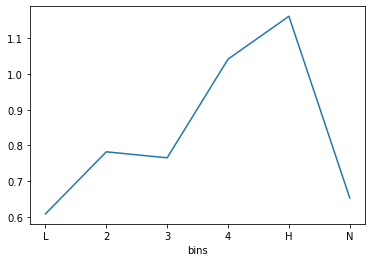

In [346]:
full_period.groupby("bins")["Excess Returns"].mean()[order].plot()

In [347]:
full_period.groupby("bins")["Excess Returns"].mean()

bins
2    0.782003
3    0.765210
4    1.041920
H    1.162209
L    0.607867
N    0.652561
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

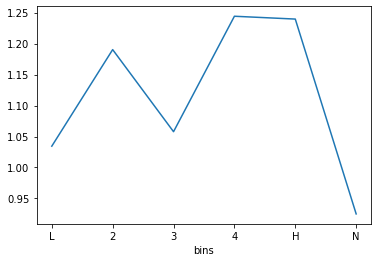

In [293]:
pre_2000.groupby("bins")["Excess Returns"].mean()[order].plot()

In [348]:
pre_2000.groupby("bins")["Excess Returns"].mean()

bins
2    1.190198
3    1.057770
4    1.244044
H    1.239480
L    1.034415
N    0.925109
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

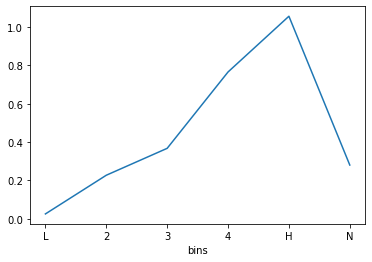

In [294]:
post_2000.groupby("bins")["Excess Returns"].mean()[order].plot()

In [349]:
post_2000.groupby("bins")["Excess Returns"].mean()

bins
2    0.227276
3    0.367629
4    0.765943
H    1.056705
L    0.025465
N    0.280428
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

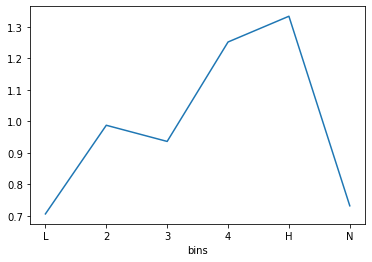

In [295]:
extra.groupby("bins")["Excess Returns"].mean()[order].plot()

In [350]:
extra.groupby("bins")["Excess Returns"].mean()

bins
2    0.987578
3    0.936286
4    1.251671
H    1.333370
L    0.706362
N    0.732070
Name: Excess Returns, dtype: float64

In [312]:
stocks_w_bins_sum = pd.merge(stocks_w_bins_sum, stocks_w_bins_sum.groupby(["datadate", "bins"])["RET"].count().reset_index().rename({"RET":"Count in Bin for Month"}, axis=1))

In [314]:
stocks_w_bins_sum["equal weight"] = 1 /stocks_w_bins_sum["Count in Bin for Month"] 

In [317]:
stocks_w_bins_sum["equal_return"] = stocks_w_bins_sum["RET"] * stocks_w_bins_sum["equal weight"]

In [318]:
equal_monthly_returns = stocks_w_bins_sum.groupby(["datadate","bins"])["equal_return"].sum().reset_index()

In [319]:
equal_monthly_returns

,datadate,bins,equal_return
0,1982-04-30,4,-0.050000
1,1982-04-30,H,0.024000
2,1982-04-30,L,0.030303
3,1982-04-30,N,0.037971
4,1982-05-31,2,-0.025175
...,...,...,...
2855,2021-12-31,3,0.011604
2856,2021-12-31,4,-0.008343
2857,2021-12-31,H,-0.065388
2858,2021-12-31,L,0.011332


In [320]:
equal_monthly_returns = pd.merge(equal_monthly_returns, fama_french[["Date", "RF"]], left_on=["datadate"], right_on=["Date"])

In [322]:
equal_monthly_returns["Excess Returns"] = equal_monthly_returns["equal_return"] - equal_monthly_returns["RF"]

In [323]:
equal_monthly_returns

,datadate,bins,equal_return,Date,RF,Excess Returns
0,1982-04-30,4,-0.050000,1982-04-30,0.0113,-0.061300
1,1982-04-30,H,0.024000,1982-04-30,0.0113,0.012700
2,1982-04-30,L,0.030303,1982-04-30,0.0113,0.019003
3,1982-04-30,N,0.037971,1982-04-30,0.0113,0.026671
4,1982-05-31,2,-0.025175,1982-05-31,0.0106,-0.035775
...,...,...,...,...,...,...
2855,2021-12-31,3,0.011604,2021-12-31,0.0001,0.011504
2856,2021-12-31,4,-0.008343,2021-12-31,0.0001,-0.008443
2857,2021-12-31,H,-0.065388,2021-12-31,0.0001,-0.065488
2858,2021-12-31,L,0.011332,2021-12-31,0.0001,0.011232


In [331]:
equal_monthly_returns["Excess Returns"] = equal_monthly_returns["Excess Returns"] * 100

In [332]:
first_period = pd.Timestamp(year=1981, month=7, day=1)
mid_period = pd.Timestamp(year=1999, month=12, day=31)
last_period = pd.Timestamp(year=2012, month=12, day=31)
extra_period = pd.Timestamp(year=2021, month=12, day=31)


full_period = equal_monthly_returns[(equal_monthly_returns["datadate"] >= first_period) & (equal_monthly_returns["datadate"] <= last_period)]
pre_2000 = equal_monthly_returns[(equal_monthly_returns["datadate"] >= first_period) & (equal_monthly_returns["datadate"] <= mid_period)]
post_2000 = equal_monthly_returns[(equal_monthly_returns["datadate"] > mid_period) & (equal_monthly_returns["datadate"] <= last_period)]
extra = equal_monthly_returns[(equal_monthly_returns["datadate"] >= first_period) & (equal_monthly_returns["datadate"] <= extra_period)]


# full_period = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= last_period)]
# pre_2000 = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= mid_period)]
# post_2000 = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] > mid_period) & (stocks_w_bins_sum["datadate"] <= last_period)]
# extra = stocks_w_bins_sum[(stocks_w_bins_sum["datadate"] >= first_period) & (stocks_w_bins_sum["datadate"] <= extra_period)]


In [333]:
order = ["L", "2", "3", "4", "H", "N"]

<AxesSubplot:xlabel='bins'>

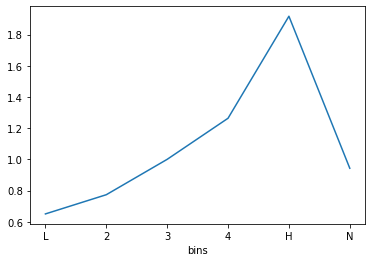

In [334]:
full_period.groupby("bins")["Excess Returns"].mean()[order].plot()

In [339]:
full_period.groupby("bins")["Excess Returns"].mean()

bins
2    0.773715
3    1.000472
4    1.263856
H    1.917773
L    0.650616
N    0.943261
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

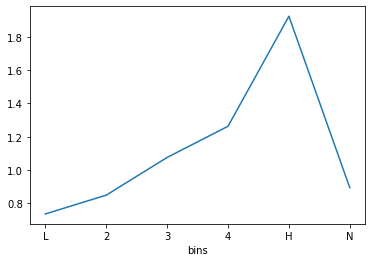

In [335]:
pre_2000.groupby("bins")["Excess Returns"].mean()[order].plot()

In [340]:
pre_2000.groupby("bins")["Excess Returns"].mean()

bins
2    0.847691
3    1.074988
4    1.262790
H    1.925662
L    0.734555
N    0.892379
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

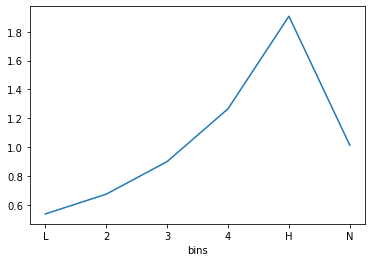

In [336]:
post_2000.groupby("bins")["Excess Returns"].mean()[order].plot()

In [341]:
post_2000.groupby("bins")["Excess Returns"].mean()

bins
2    0.673182
3    0.899206
4    1.265312
H    1.907002
L    0.536006
N    1.012734
Name: Excess Returns, dtype: float64

<AxesSubplot:xlabel='bins'>

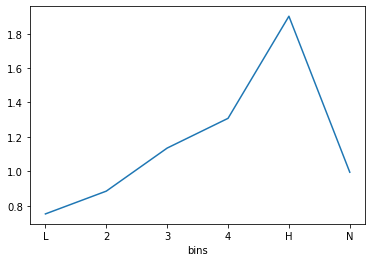

In [337]:
extra.groupby("bins")["Excess Returns"].mean()[order].plot()

In [342]:
extra.groupby("bins")["Excess Returns"].mean()

bins
2    0.884617
3    1.134992
4    1.307908
H    1.901578
L    0.752105
N    0.994493
Name: Excess Returns, dtype: float64